In [1]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
import pprint as pp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df = df[(df["item"]==1) & (df['store']==1)] # Store 1 and item 1 only
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df = df.drop(columns=['item', 'store'])
df.columns

Index(['date', 'sales'], dtype='object')

In [7]:
df.to_excel("dataset.xlsx")

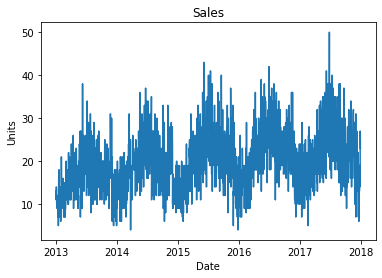

In [ ]:
plt.plot(df['date'],df['sales'])
plt.title('Sales')
plt.xlabel('Date')
plt.ylabel('Units')
plt.show()

In [ ]:
raw_seq = df['sales']

In [ ]:
# univariate data preparation
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
def mlp_model(n_steps):
    inputs = Input(shape=n_steps)
    
    X = Dense(512, activation='relu')(inputs)
    X = Dropout(0.2)(X)
    X = Dense(352, activation='tanh')(X)
    X = Dropout(0.1)(X)
    X = Dense(448, activation='tanh')(X)
    X = Dropout(0.4)(X)
    X = Dense(384, activation='tanh')(X)
    X = Dropout(0.2)(X)
    X = Dense(288, activation='tanh')(X)
    X = Dropout(0.3)(X)
    X = Dense(224, activation='tanh')(X)
    X = Dropout(0.3)(X)
    X = Dense(160, activation='tanh')(X)
    X = Dense(384, activation='tanh')(X)
    X = Dropout(0.2)(X)
    X = Dense(512, activation='tanh')(X)
    X = Dropout(0.2)(X)
    X = Dense(512, activation='tanh')(X)
    X = Dropout(0.4)(X)
    X = Dense(448, activation='tanh')(X)
    X = Dropout(0.4)(X)
    X = Dense(320, activation='tanh')(X)
    X = Dropout(0.1)(X)
    X = Dense(64, activation='tanh')(X)
    X = Dropout(0.3)(X)
    X = Dense(384, activation='tanh')(X)
    X = Dropout(0.1)(X)
    X = Dense(96, activation='tanh')(X)
    X = Dropout(0.2)(X)
    X = Dense(256, activation='tanh')(X)
    X = Dense(64, activation='tanh')(X)
    X = Dropout(0.4)(X)
    X = Dense(320, activation='tanh')(X)
    X = Dropout(0.1)(X)
    X = Dense(480, activation='tanh')(X)
    X = Dropout(0.3)(X)
    X = Dense(256, activation='tanh')(X)
    X = Dropout(0.2)(X)

    outputs = Dense(1)(X)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mlp_model")
    return model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=100, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

In [ ]:
def run_model(sequence, n_steps):
    train_seq = sequence[:-365]
    test_seq = sequence[-365:]
    X_train, y_train = split_sequence(train_seq, n_steps)
    X_test, y_test = split_sequence(test_seq, n_steps)
    model = mlp_model(n_steps)
    tf.keras.utils.plot_model(model,to_file='model.png',dpi=600,show_layer_activations=True)
    model.compile(optimizer="adam", loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsolutePercentageError()])
    # fit model
    hist =  model.fit(X_train, y_train, batch_size=120, epochs=2000, verbose=2, validation_split=0.2, callbacks=[callback])
    score = model.evaluate(X_test, y_test, return_dict=True)
    y_pred = model.predict(X_test)
    return (hist, score, y_test, y_pred)

In [ ]:
hist, score, y_test, y_pred = run_model(raw_seq, 5)


KeyError: ignored

In [ ]:
dnn_result = pd.DataFrame(hist.history)
dnn_result.to_excel('dnn_result.xlsx')

In [ ]:
score